In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.cluster import KMeans
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Part A: Product affinity based segmentation

In [2]:
df = pd.read_csv('mugs-preference-parameters-full.csv')
demo = pd.read_csv('demographics-full.csv')
c = 0.0139

In [3]:
imp_matrix = df.iloc[:,-6:]
feature_matrix = df.iloc[:,:-6]

multiplier = {" pPr30": " IPr"," pPr10": " IPr"," pPr05": " IPr",
              "pIn0.5": "Iin", "pIn1": "Iin", "pIn3": "Iin",
              " pCp12": " ICp", " pCp20": " ICp", " pCp32": " ICp", 
              " pClD": " ICl", " pClF": " ICl", " pClE": " ICl", 
              "pCnSl": "Icn","pCnSp": "Icn", "pCnLk": "Icn", 
              " pBrA": " IBr"," pBrB": " IBr", " pBrC": " IBr"}

weighted_feature = feature_matrix.copy()

for col1, col2 in multiplier.items():
    weighted_feature[col1] = weighted_feature[col1] * imp_matrix[col2]

In [4]:
brands = pd.DataFrame([[" pPr30", "pIn3"," pCp20"," pClE", "pCnLk", " pBrA"],
                      [" pPr10", "pIn1"," pCp20"," pClF", "pCnSp", " pBrB"],
                      [" pPr30", "pIn3"," pCp20"," pClE", "pCnLk", " pBrC"]])

out_1 = [ ]
for index, rows in weighted_feature.iterrows():
    out = []
    for rows_1 in brands.itertuples():
        cols = list(rows_1)
        cols.pop(0)
        U = rows.loc[cols].sum()
        out.append(U)
    out_1.append(out)
    
a = np.exp(np.multiply(c,out_1))
probs = pd.DataFrame(a)
probs['sum'] = probs.sum(axis=1)
probs.iloc[:, :3] = probs.iloc[:, :3].div(probs.iloc[:, -1], axis=0)
means = np.array([probs.iloc[:, i].mean() for i in range(3)])

In [5]:
pref_imp_demo_matrix = pd.merge(df, demo, left_on=['Cust'], right_on=['id'], how='left')
pref_imp_demo_matrix = pref_imp_demo_matrix.drop(['id'], axis=1)

### Answer for Part(A), Question 1:

In [6]:
c = np.sum(np.multiply(pref_imp_demo_matrix.drop(['Cust'], axis=1), probs[[2]]))
seg3mean = np.divide(c, np.sum(probs[2], axis=0))
round(seg3mean,3)

/var/folders/k1/wt5v61sd6jd7_9m6k1cwqx8c0000gn/T/ipykernel_13872/3589575583.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  c = np.sum(np.multiply(pref_imp_demo_matrix.drop(['Cust'], axis=1), probs[[2]]))


 pPr30       1.000
 pPr10       5.015
 pPr05       7.000
pIn0.5       1.000
pIn1         3.914
pIn3         7.000
 pCp12       3.096
 pCp20       5.328
 pCp32       3.880
 pClD        1.000
 pClF        4.870
 pClE        7.000
pCnSl        1.000
pCnSp        3.781
pCnLk        7.000
 pBrA        3.891
 pBrB        3.609
 pBrC        4.464
 IPr        25.956
Iin         11.139
 ICp        12.198
 ICl        21.132
Icn         16.648
 IBr        12.966
income      57.745
age         46.474
sports       0.448
gradschl     0.448
dtype: float64

### Answer for Part(A), Question 2:

In [7]:
# descriptors for Brand A product
a = np.sum(np.multiply(pref_imp_demo_matrix.drop(['Cust'], axis=1), probs[[0]]))
seg1mean = np.divide(a, np.sum(probs[0], axis=0))
round(seg1mean,3)

/var/folders/k1/wt5v61sd6jd7_9m6k1cwqx8c0000gn/T/ipykernel_13872/3483714746.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  a = np.sum(np.multiply(pref_imp_demo_matrix.drop(['Cust'], axis=1), probs[[0]]))


 pPr30       1.000
 pPr10       4.920
 pPr05       7.000
pIn0.5       1.000
pIn1         4.021
pIn3         7.000
 pCp12       3.267
 pCp20       5.367
 pCp32       3.789
 pClD        1.000
 pClF        4.869
 pClE        7.000
pCnSl        1.000
pCnSp        3.850
pCnLk        7.000
 pBrA        5.430
 pBrB        3.501
 pBrC        3.040
 IPr        18.042
Iin         13.357
 ICp        16.362
 ICl        18.475
Icn         20.659
 IBr        13.117
income      60.169
age         46.712
sports       0.471
gradschl     0.360
dtype: float64

In [8]:
# descriptors for Brand B product
b = np.sum(np.multiply(pref_imp_demo_matrix.drop(['Cust'], axis=1), probs[[1]]))
seg2mean = np.divide(b, np.sum(probs[1], axis=0))
round(seg2mean,3)

/var/folders/k1/wt5v61sd6jd7_9m6k1cwqx8c0000gn/T/ipykernel_13872/2258628479.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  b = np.sum(np.multiply(pref_imp_demo_matrix.drop(['Cust'], axis=1), probs[[1]]))


 pPr30       1.000
 pPr10       5.667
 pPr05       7.000
pIn0.5       1.000
pIn1         4.133
pIn3         7.000
 pCp12       3.108
 pCp20       5.337
 pCp32       3.970
 pClD        1.000
 pClF        5.038
 pClE        7.000
pCnSl        1.000
pCnSp        4.127
pCnLk        7.000
 pBrA        2.896
 pBrB        4.608
 pBrC        4.404
 IPr        38.985
Iin          8.963
 ICp        12.162
 ICl        14.565
Icn         12.399
 IBr        12.891
income      49.634
age         42.849
sports       0.168
gradschl     0.248
dtype: float64

In [9]:
desc = pref_imp_demo_matrix.drop(['Cust'], axis=1).columns
ovr_mean = []
for i in desc:
    means = pref_imp_demo_matrix[i].mean()
    ovr_mean.append(means)
    
log_lift_table = pd.DataFrame(data={'Descriptors': desc, 'SegA_mean': seg1mean, 'SegB_mean': seg2mean, 'SegC_mean': seg3mean, 'Ovr_mean': ovr_mean})
log_lift_table['loglift_A'] = np.log10(log_lift_table['SegA_mean'] / log_lift_table['Ovr_mean'])
log_lift_table['loglift_B'] = np.log10(log_lift_table['SegB_mean'] / log_lift_table['Ovr_mean'])
log_lift_table['loglift_C'] = np.log10(log_lift_table['SegC_mean'] / log_lift_table['Ovr_mean'])
log_lift_table

,Descriptors,SegA_mean,SegB_mean,SegC_mean,Ovr_mean,loglift_A,loglift_B,loglift_C
pPr30,pPr30,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00
pPr10,pPr10,4.919712,5.667076,5.015364,5.266881,-0.029614,3.180552e-02,-2.125109e-02
pPr05,pPr05,7.000000,7.000000,7.000000,7.000000,0.000000,-4.821637e-17,-4.821637e-17
pIn0.5,pIn0.5,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00
pIn1,pIn1,4.020969,4.133307,3.914222,4.041801,-0.002244,9.722774e-03,-1.392948e-02
pIn3,pIn3,7.000000,7.000000,7.000000,7.000000,0.000000,-4.821637e-17,-4.821637e-17
pCp12,pCp12,3.266582,3.108500,3.096420,3.154341,0.015185,-6.357811e-03,-8.048761e-03
pCp20,pCp20,5.366723,5.337482,5.327869,5.344051,0.001839,-5.342205e-04,-1.317079e-03
pCp32,pCp32,3.789008,3.970346,3.879561,3.890675,-0.011500,8.803384e-03,-1.242422e-03
pClD,pClD,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00


In [10]:
# log_lift_table.to_csv('loglift_table.csv', index=False)

## Part B: Classical Segmentation
### Choosing k

In [11]:
np.random.seed(410014)

[]

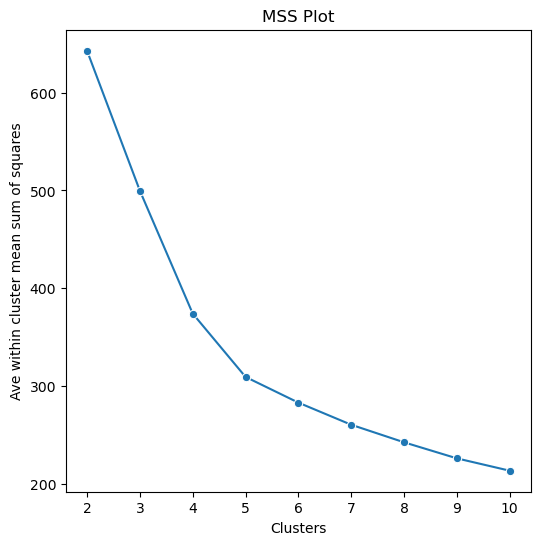

In [12]:
X = df.drop(['Cust'], axis=1)

mss = []
for k in range(2,11):
    kmeansModel = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeansModel.fit(X)
    ave_within_cluster_mean_sum_of_squares = (kmeansModel.inertia_) / X.shape[0]
    mss.append(ave_within_cluster_mean_sum_of_squares)

plt.figure(figsize=(6,6))
sns.lineplot(x = range(2,11), y = mss, marker = "o")
plt.title('MSS Plot')
plt.ylabel('Ave within cluster mean sum of squares')
plt.xlabel('Clusters')
plt.plot()

In [13]:
kmeansModel1 = KMeans(n_clusters=4, n_init=50, max_iter=100)
kmeansModel1.fit(X)
print(dict(Counter(kmeansModel1.labels_)))
# print(kmeansModel1.cluster_centers_)
kmeansModel1.inertia_

{0: 54, 1: 148, 2: 55, 3: 54}


116372.79205114205

In [14]:
kmeansModel2 = KMeans(n_clusters=5, n_init=50, max_iter=100)
kmeansModel2.fit(X)
print(dict(Counter(kmeansModel2.labels_)))
# print(kmeansModel1.cluster_centers_)
kmeansModel2.inertia_

{1: 42, 0: 142, 4: 54, 2: 33, 3: 40}


96249.07331344973

In [15]:
kmeansModel3 = KMeans(n_clusters=6, n_init=50, max_iter=100)
kmeansModel3.fit(X)
print(dict(Counter(kmeansModel3.labels_)))
# print(kmeansModel1.cluster_centers_)
kmeansModel3.inertia_

{4: 39, 2: 34, 1: 134, 5: 44, 0: 49, 3: 11}


88162.16274454672

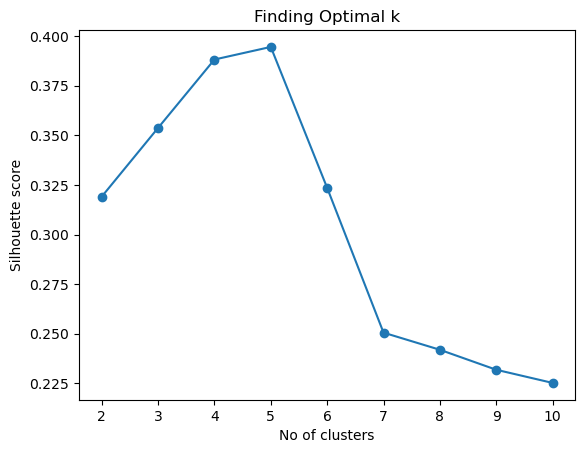

In [16]:
# below code is modified from analyticsvidhya.com

from sklearn.metrics import silhouette_score
silhouette_avg = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(range(2,11), silhouette_avg, marker='o')
plt.xlabel('No of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Finding Optimal k')
plt.show()

### Part(B) Question 1:

In [17]:
seg_labels = pd.DataFrame(data = {'segments': list(kmeansModel2.labels_)})
partB_df = pd.concat([pref_imp_demo_matrix, seg_labels], axis = 1)
profiling_means = partB_df.groupby(['segments']).mean().reset_index()
profiling_means = profiling_means.T.drop(['Cust','segments'], axis=0)

In [18]:
profiling_means['ovr_mean'] = ovr_mean

### Part(B) Question 2:

In [19]:
profiling_means['loglift_0'] = np.log10(profiling_means[0] / profiling_means['ovr_mean'])
profiling_means['loglift_1'] = np.log10(profiling_means[1] / profiling_means['ovr_mean'])
profiling_means['loglift_2'] = np.log10(profiling_means[2] / profiling_means['ovr_mean'])
profiling_means['loglift_3'] = np.log10(profiling_means[3] / profiling_means['ovr_mean'])
profiling_means['loglift_4'] = np.log10(profiling_means[4] / profiling_means['ovr_mean'])
profiling_means

,0,1,2,3,4,ovr_mean,loglift_0,loglift_1,loglift_2,loglift_3,loglift_4
pPr30,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pPr10,5.556338,5.190476,4.727273,4.900,5.166667,5.266881,0.023235,-0.006346,-0.046943,-0.031357,-0.008343
pPr05,7.000000,7.000000,7.000000,7.000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pIn0.5,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pIn1,4.049296,3.976190,4.606061,4.075,3.703704,4.041801,0.000805,-0.007108,0.056755,0.003553,-0.037939
pIn3,7.000000,7.000000,7.000000,7.000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pCp12,2.852113,2.761905,3.363636,4.375,3.222222,3.154341,-0.043742,-0.057700,0.027900,0.142069,0.009247
pCp20,5.169014,5.428571,4.787879,6.000,5.592593,5.344051,-0.014463,0.006815,-0.047727,0.050281,0.019743
pCp32,4.225352,4.285714,3.939394,2.825,3.462963,3.890675,0.035838,0.041998,0.005404,-0.139007,-0.050577
pClD,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
# profiling_means.to_csv('segments.csv')